In [1]:
#소득예측 제대로 분석

In [22]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [23]:
import pandas as pd

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

display(train.head(3))
# display(test.head(3))

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860


In [3]:
import matplotlib.pyplot as plt

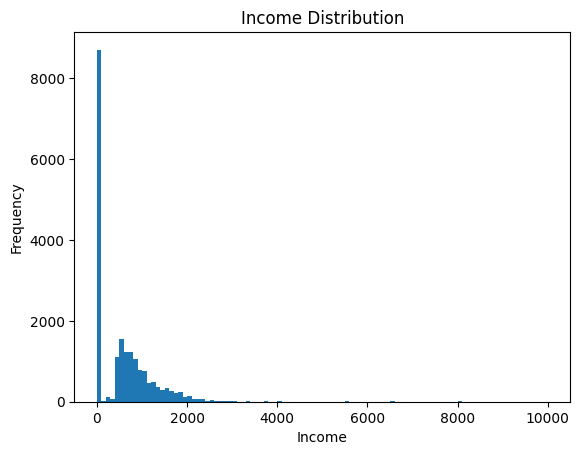

In [10]:
import matplotlib.pyplot as plt

# train 데이터프레임에서 Income 열을 사용하여 히스토그램을 그립니다.
plt.hist(train.Income, bins=range(int(min(train.Income)), int(max(train.Income)) + 100, 100))
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.show()


In [13]:
len(train.Income[train.Income==0])

8697

In [14]:
len(train.Income)

20000

In [15]:
import pandas as pd
from autogluon.tabular import TabularPredictor

# train 데이터에서 Income이 0인 행 제거
train = train[train['Income'] != 0]

# Autogluon을 사용하여 모델 학습 및 예측
label = 'Income'  # 예측할 타겟 변수
predictor = TabularPredictor(label=label, path='ag_models').fit(train_data=train)
predictions = predictor.predict(test)


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "ag_models"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #44-Ubuntu SMP Fri Jan 19 20:16:38 UTC 2024
CPU Count:          128
Memory Avail:       467.55 GB / 503.72 GB (92.8%)
Disk Space Avail:   86.36 GB / 1757.88 GB

In [16]:
predictions

0        797.440491
1        702.252136
2        461.121338
3        720.697876
4        343.188324
           ...     
9995    1425.820435
9996     810.996216
9997     516.902161
9998     419.314392
9999    1031.972412
Name: Income, Length: 10000, dtype: float32

In [21]:
submit = pd.read_csv('sample_submission.csv')
submit.Income = predictions
submit.to_csv("submission.csv",index=False)